In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tiempos V1

In [4]:
TIEMPOS_DIR = "./tiempos/v1"

procesos = os.listdir(TIEMPOS_DIR)
# print(procesos)

all_data = []   
for p in procesos:
    path_tiempos = os.path.join(TIEMPOS_DIR, p)
    csv_path = os.path.join(path_tiempos, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data.append(df)


df_all = pd.concat(all_data, ignore_index=True)
display(df_all)


,Step,Computo,Comunicacion,N,p
0,0,0.000115,0.000668,156800,49
1,1,0.014296,0.001107,156800,49
2,2,0.000905,0.000517,156800,49
3,3,0.009327,0.000000,156800,49
4,4,0.014216,0.000000,156800,49
...,...,...,...,...,...
331,2,0.004278,0.222085,78400,100
332,3,0.002100,0.000000,78400,100
333,4,0.003448,0.000000,78400,100
334,5,0.000000,0.026738,78400,100


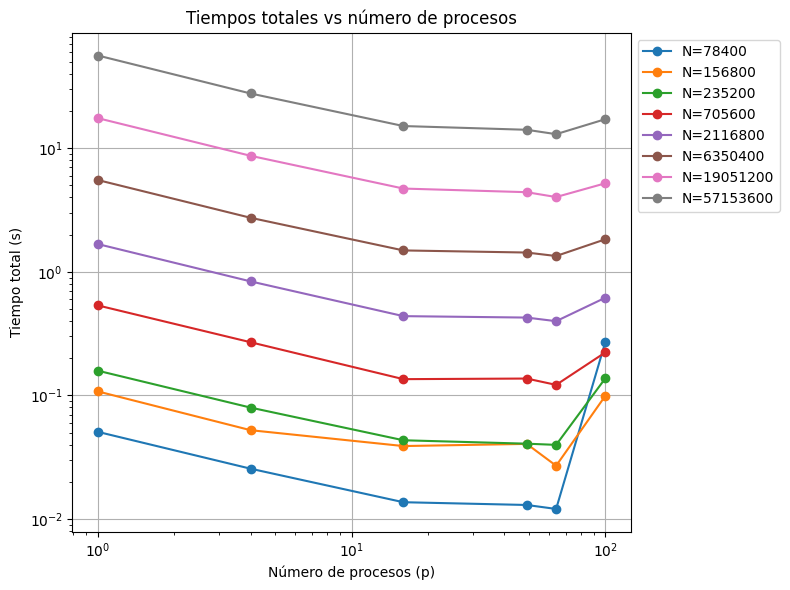

In [5]:
df_filtered = df_all[df_all['Step'] != 6]
df_filtered = df_filtered[df_filtered['Step'] != 0]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']
df_grouped = (
    df_filtered
    .groupby(['N', 'p'], as_index=False)[['Total']].sum()
)

unique_N = sorted(df_grouped['N'].unique())
cmap = plt.get_cmap('tab10')
colors = {N: cmap(i % 10) for i, N in enumerate(unique_N)}

df_filtered = df_all[df_all['Step'] != 6]
df_filtered = df_filtered[df_filtered['Step'] != 0]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']
df_grouped = df_filtered.groupby(['N', 'p'], as_index=False)[['Total']].sum()

plt.figure(figsize=(8, 6))

for N, df_N in df_grouped.groupby('N'):
    plt.plot(df_N['p'], df_N['Total'],
             marker='o',
             label=f'N={N}',
             color=colors[N])

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Número de procesos (p)')
plt.ylabel('Tiempo total (s)')
plt.title('Tiempos totales vs número de procesos')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_2739/1466095413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']


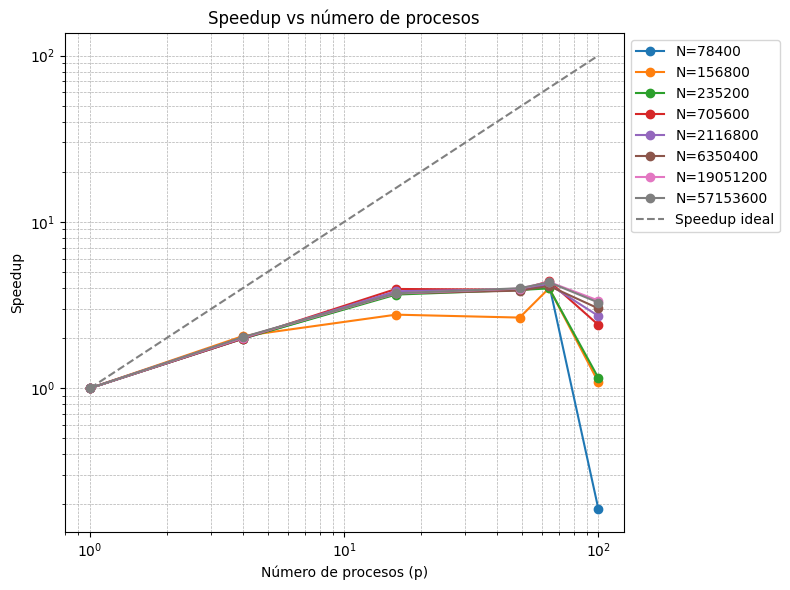

In [6]:
df_filtered = df_all[df_all['Step'].isin([1,2,3,4,5])]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']
df_grouped = df_filtered.groupby(['N', 'p'], as_index=False)[['Total']].sum()

plt.figure(figsize=(8, 6))

for N, df_N in df_grouped.groupby('N'):
    if 1 not in df_N['p'].values:
        continue
        
    t1 = df_N.loc[df_N['p'] == 1, 'Total'].values[0]
    df_N = df_N.copy()
    df_N['Speedup'] = t1 / df_N['Total']

    plt.plot(df_N['p'], df_N['Speedup'],
             marker='o',
             label=f'N={N}',
             color=colors[N])   # ← MISMO color

# Curva ideal
p_vals = np.logspace(np.log10(df_grouped['p'].min()),
                     np.log10(df_grouped['p'].max()), 100)

plt.plot(p_vals, p_vals, '--', color='gray', linewidth=1.5, label='Speedup ideal')

plt.xscale('log')
plt.yscale('log')
plt.title('Speedup vs número de procesos')
plt.xlabel('Número de procesos (p)')
plt.ylabel('Speedup')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


/tmp/ipykernel_2739/451772680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']


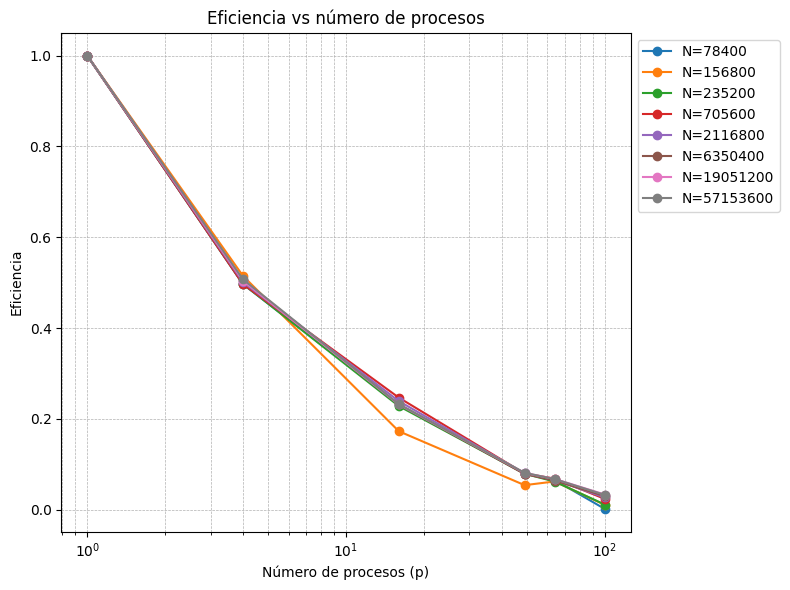

In [7]:
df_filtered = df_all[df_all['Step'].isin([1,2,3,4,5])]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']
df_grouped = df_filtered.groupby(['N', 'p'], as_index=False)[['Total']].sum()

unique_N = sorted(df_grouped['N'].unique())
cmap = plt.get_cmap('tab10')
colors = {N: cmap(i % 10) for i, N in enumerate(unique_N)}

plt.figure(figsize=(8, 6))

for N, df_N in df_grouped.groupby('N'):
    if 1 not in df_N['p'].values:
        continue

    t1 = df_N.loc[df_N['p'] == 1, 'Total'].values[0]
    df_N = df_N.copy()
    df_N['Speedup'] = t1 / df_N['Total']
    df_N['Eficiencia'] = df_N['Speedup'] / df_N['p']

    plt.plot(df_N['p'], df_N['Eficiencia'],
             marker='o',
             label=f'N={N}',
             color=colors[N])

plt.xscale('log')
plt.xlabel('Número de procesos (p)')
plt.ylabel('Eficiencia')
plt.title('Eficiencia vs número de procesos')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# v1 vs v2

/tmp/ipykernel_2739/2191638417.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']


./graficos/comparacion_versiones_tiempo.png


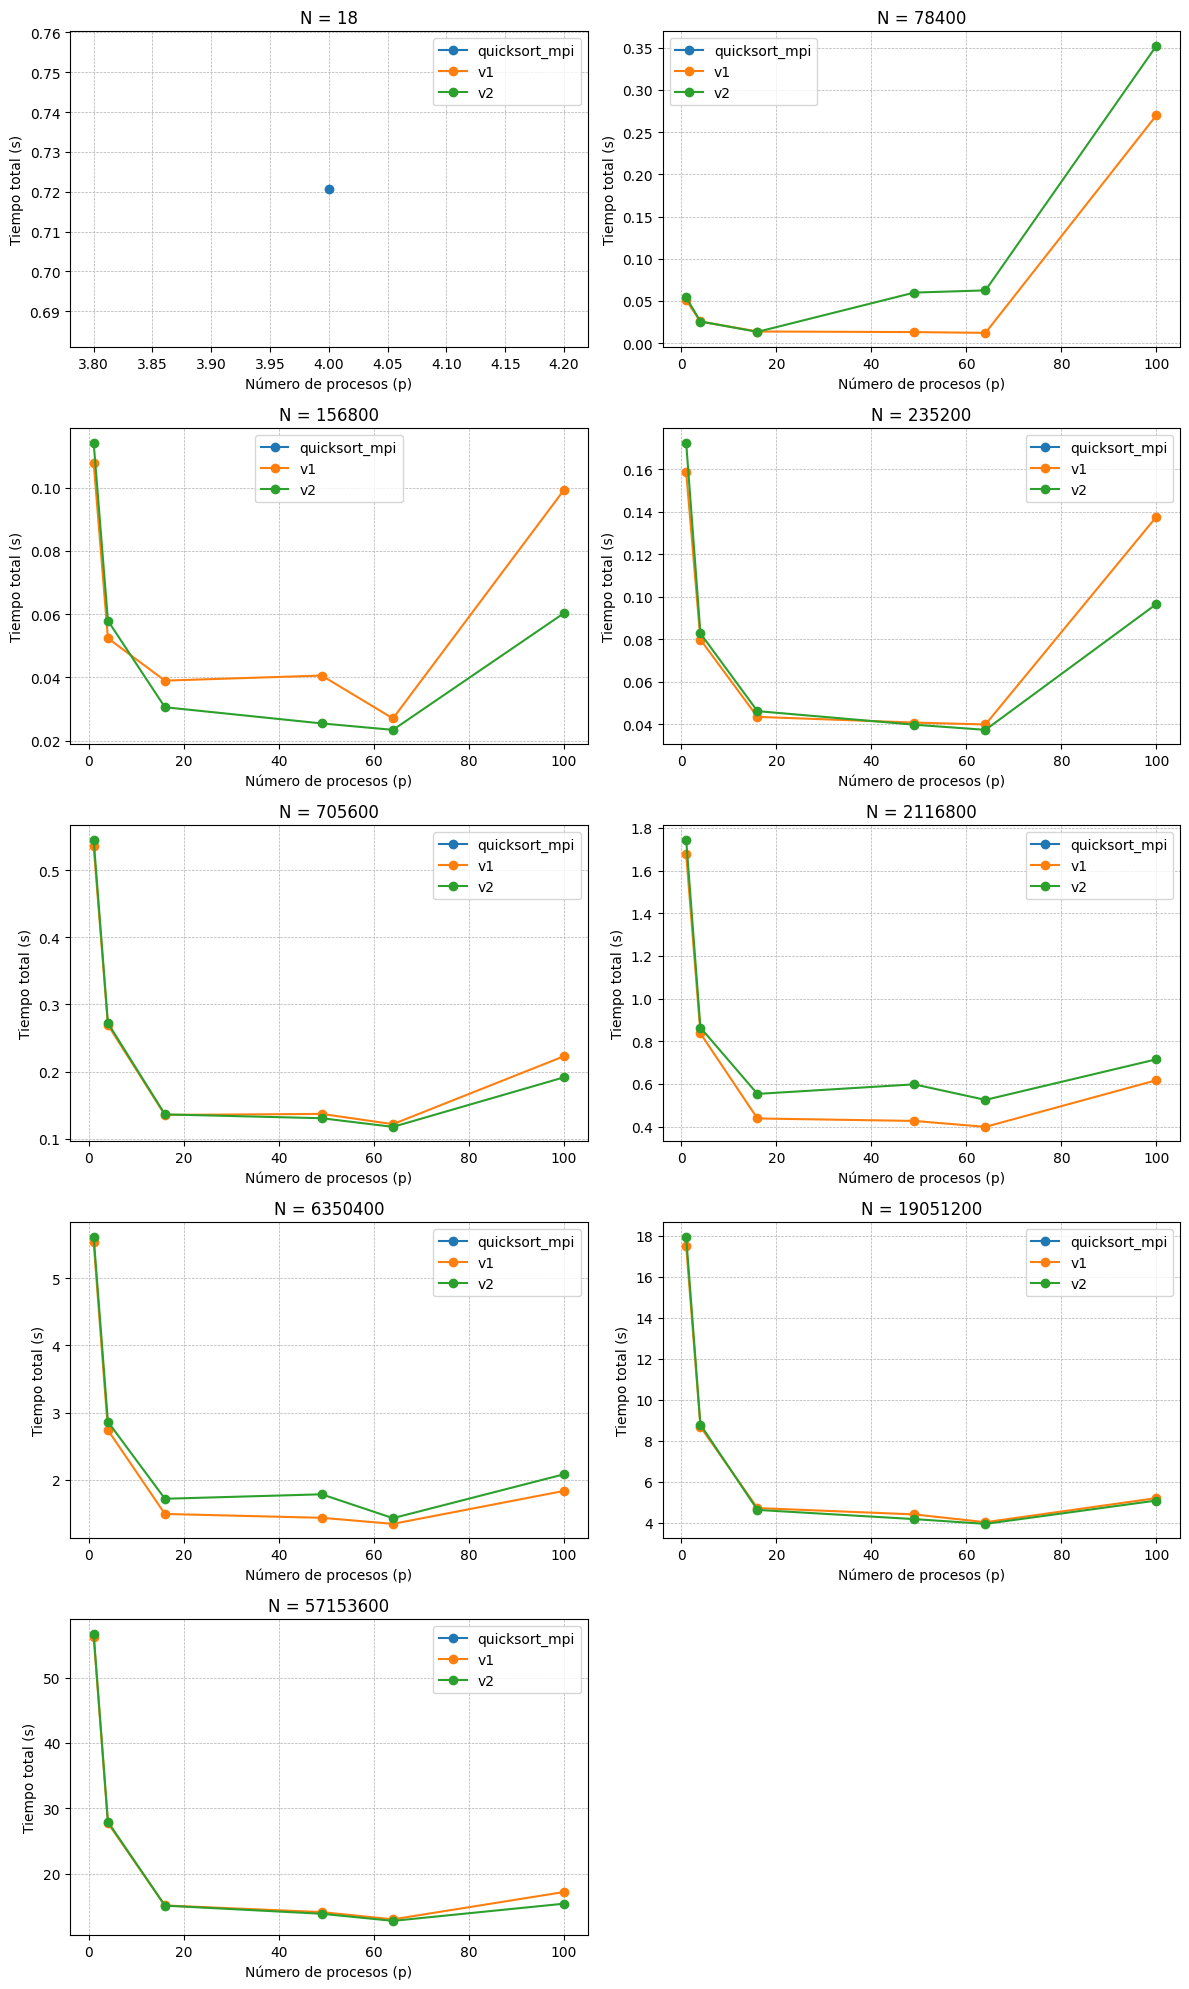

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

TIEMPOS_DIR = "./tiempos"
OUT_DIR = "./graficos"

rows = []

for version in sorted(os.listdir(TIEMPOS_DIR)):
    vpath = os.path.join(TIEMPOS_DIR, version)

    for p in sorted(os.listdir(vpath), key=int):
        csv_path = os.path.join(vpath, p, 'tiempos.csv')
        df = pd.read_csv(csv_path)

        df['p'] = int(p)
        df['version'] = version
        rows.append(df)

df_all = pd.concat(rows, ignore_index=True)

df_filtered = df_all[(df_all['Step'] != 6) & (df_all['Step'] != 0)]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']

df_grouped = df_filtered.groupby(['version', 'N', 'p'], as_index=False)[['Total']].sum()

Ns = sorted(df_grouped['N'].unique())
versions = sorted(df_grouped['version'].unique())

cmap = plt.get_cmap('tab10')
colors = {v: cmap(i % 10) for i, v in enumerate(versions)}

ncols = 2
nrows = (len(Ns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten()

for i, N in enumerate(Ns):
    ax = axes[i]

    for v in versions:
        df_v = df_grouped[(df_grouped['version'] == v) & (df_grouped['N'] == N)].copy()
        df_v = df_v.sort_values('p')

        ax.plot(df_v['p'], df_v['Total'],
                marker='o',
                label=v,
                color=colors[v])

    ax.set_title(f"N = {N}")
    ax.set_xlabel("Número de procesos (p)")
    ax.set_ylabel("Tiempo total (s)")
    ax.grid(True, linestyle="--", linewidth=0.5)
    ax.legend()

for j in range(len(Ns), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()

os.makedirs(OUT_DIR, exist_ok=True)
out_path = f"{OUT_DIR}/comparacion_versiones_tiempo.png"
fig.savefig(out_path, dpi=200)
print(out_path)


# Comparación con Quicksort

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

TIEMPOS_MPI = "./tiempos/quicksort_mpi"
procesos_mpi = os.listdir(TIEMPOS_MPI)
data_mpi = []

for p in procesos_mpi:
    path_csv = os.path.join(TIEMPOS_MPI, p, "tiempos.csv")
    df = pd.read_csv(path_csv)

    row = df.iloc[0].copy()
    row['p'] = int(p)      # proceso = nombre de carpeta
    row['Total'] = row['Computo'] + row['Comunicacion']

    data_mpi.append(row)

df_mpi = pd.DataFrame(data_mpi)
display(df_mpi)

,Step,Computo,Comunicacion,N,p,Total
0,0.0,0.000197,0.0,18.0,4.0,0.000197
